# Lab Assignment One: Exploring Table Data

### Luis Garduno

## 1. Business Understanding

#### About League of Legends :
Developed by Riot Studios, League of Legends, or "LoL", is an online multiplayer
video-game that is available to Windows/MacOS users. LoL consists 2 teams ('Blue
& 'Red') facing each other, where the main objective is to destroy the opposing
teams 'Nexus', or home base, while facing obstacles like destroying towers &
eliminating players throughout the way. Perks & gold are able to be obtained by
players/teams through completing tasks such as eliminating players, enemy creeps,
or dragons. Players then spend the gold to purchase items that help deal more
damage towards enemies.

League of Legends offers different game modes, such as ranked. A ranked game on
average lasts 30-45 minutes. In this game mode, players are given a rank based
off of the number of wins + the number of games played. "Diamond" is one of the
highest ranks a player may obtain and is known to be extremely competitive. The
dataset contains the first 10 minute analytics of each team for different
diamond ranked matches.

Once the data is analyzed, teams/players would be able to conceptualize the
level of priority different features/objectives have during early stages of
diamond ranked matches. They could then use this information to adjust their
strategy to one proven to win matches.

-------------------------------------

Dataset : https://www.kaggle.com/bobbyscience/league-of-legends-diamond-ranked-games-10-min

Question Of Interest : As of the first 10 minutes, which team will win?

## 2. Data Understanding

### 2.1 Data Description

In [1]:
import numpy as np
import pandas as pd

# Load in the dataset into a dataframe
df = pd.read_csv('https://raw.githubusercontent.com/luisegarduno/MachineLearning_Projects/master/Datasets/high_diamond_ranked_10min.csv')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9879 entries, 0 to 9878
Data columns (total 40 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   gameId                        9879 non-null   int64  
 1   blueWins                      9879 non-null   int64  
 2   blueWardsPlaced               9879 non-null   int64  
 3   blueWardsDestroyed            9879 non-null   int64  
 4   blueFirstBlood                9879 non-null   int64  
 5   blueKills                     9879 non-null   int64  
 6   blueDeaths                    9879 non-null   int64  
 7   blueAssists                   9879 non-null   int64  
 8   blueEliteMonsters             9879 non-null   int64  
 9   blueDragons                   9879 non-null   int64  
 10  blueHeralds                   9879 non-null   int64  
 11  blueTowersDestroyed           9879 non-null   int64  
 12  blueTotalGold                 9879 non-null   int64  
 13  blu

---------------------------------

Printing out the information about the dataframe we able to see that there are a
total of 9,879 instances, and 39 attributes.

Additionally we are able to see that there are 19 of the same attributes for each
the blue & red team (columns 1-19 are the same as 20-38).

Features for each team includes :
- Wards placed & destroyed
- Total number of kills, deaths, & assists
- First Bloods (1st elimination of the game)
- Total : towers destroyed, gold, experience
- Average : level, CS per minute, & gold per minute
- Difference in gold & experience between the teams
- Objective eliminations : elite monsters, dragons, heralds, minions, & jungle minions

Attributes such as total gold, experience, objectives eliminations, towers destroyed, etc.
will be of type integer (int64) because they will always be whole numbers. Attributes involving
averages such as cs per minute, gold per minute, & level, should be the only of double-precision floating-point
format (float64).

The data type for "blueWins" and "first bloods" could be changed to be of type boolean, but because we are wanting to
visualize these attributes, optimally it is best to keep these as integer data types. As a result,
the data types presented for each attribute are correct and should not be changed.

Below is a brief description of some of the key attributes.

In [2]:
import matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# describe dataframe
df.describe()

,gameId,blueWins,blueWardsPlaced,blueWardsDestroyed,blueFirstBlood,blueKills,blueDeaths,blueAssists,blueEliteMonsters,blueDragons,...,redTowersDestroyed,redTotalGold,redAvgLevel,redTotalExperience,redTotalMinionsKilled,redTotalJungleMinionsKilled,redGoldDiff,redExperienceDiff,redCSPerMin,redGoldPerMin
count,9.879000e+03,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,...,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000,9879.000000
mean,4.500084e+09,0.499038,22.288288,2.824881,0.504808,6.183925,6.137666,6.645106,0.549954,0.361980,...,0.043021,16489.041401,6.925316,17961.730438,217.349226,51.313088,-14.414111,33.620306,21.734923,1648.904140
std,2.757328e+07,0.500024,18.019177,2.174998,0.500002,3.011028,2.933818,4.064520,0.625527,0.480597,...,0.216900,1490.888406,0.305311,1198.583912,21.911668,10.027885,2453.349179,1920.370438,2.191167,149.088841
min,4.295358e+09,0.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,11212.000000,4.800000,10465.000000,107.000000,4.000000,-11467.000000,-8348.000000,10.700000,1121.200000
25%,4.483301e+09,0.000000,14.000000,1.000000,0.000000,4.000000,4.000000,4.000000,0.000000,0.000000,...,0.000000,15427.500000,6.800000,17209.500000,203.000000,44.000000,-1596.000000,-1212.000000,20.300000,1542.750000
50%,4.510920e+09,0.000000,16.000000,3.000000,1.000000,6.000000,6.000000,6.000000,0.000000,0.000000,...,0.000000,16378.000000,7.000000,17974.000000,218.000000,51.000000,-14.000000,28.000000,21.800000,1637.800000
75%,4.521733e+09,1.000000,20.000000,4.000000,1.000000,8.000000,8.000000,9.000000,1.000000,1.000000,...,0.000000,17418.500000,7.200000,18764.500000,233.000000,57.000000,1585.500000,1290.500000,23.300000,1741.850000
max,4.527991e+09,1.000000,250.000000,27.000000,1.000000,22.000000,22.000000,29.000000,2.000000,1.000000,...,2.000000,22732.000000,8.200000,22269.000000,289.000000,92.000000,10830.000000,9333.000000,28.900000,2273.200000


In [3]:
df_data_description = pd.DataFrame({'Features' : ['blueWins','WardsPlaced / WardsDestroyed','FirstBlood','Kills / Deaths / Assists','TowersDestroyed',
                                                  'TotalGold','AvgLevel','TotalExperience','CSPerMin','GoldPerMin']})

df_data_description['Description'] = ['whether blue team won or not','number of total wards placed or destroyed by team','team with the first kill of game',
                                      'total number of kills, deaths, or assists of team','total number of towers destroyed by team','total gold obtained by team',
                                      'average level of all players on team','total experience points accumulated by team','average creep score per minute',
                                      'average gold obtained per minute']

df_data_description['Feature type'] = ['Discrete','Continuous','Discrete','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous','Continuous']

df_data_description['Attribute Type'] = ['nominal','ratio','nominal','ratio','ratio','ratio','ratio','ratio','ratio','ratio']

df_data_description['Range'] = ['0: red team won; 1: blue team won','placed: 5 - 250;destroyed: 0 - 27','0: did not get first kill; 1: team obtained first kill',
                                'kills: 0-22;deaths: 0-22;assists: 0-29','0 - 2','11,000 - 25,000','4.5 - 8.5','10,000 - 24,000','10.0 - 30.0','1,100.0 - 2,000.0']
df_data_description

,Features,Description,Feature type,Attribute Type,Range
0,blueWins,whether blue team won or not,Discrete,nominal,0: red team won; 1: blue team won
1,WardsPlaced / WardsDestroyed,number of total wards placed or destroyed by team,Continuous,ratio,placed: 5 - 250;destroyed: 0 - 27
2,FirstBlood,team with the first kill of game,Discrete,nominal,0: did not get first kill; 1: team obtained fi...
3,Kills / Deaths / Assists,"total number of kills, deaths, or assists of team",Continuous,ratio,kills: 0-22;deaths: 0-22;assists: 0-29
4,TowersDestroyed,total number of towers destroyed by team,Continuous,ratio,0 - 2
5,TotalGold,total gold obtained by team,Continuous,ratio,"11,000 - 25,000"
6,AvgLevel,average level of all players on team,Continuous,ratio,4.5 - 8.5
7,TotalExperience,total experience points accumulated by team,Continuous,ratio,"10,000 - 24,000"
8,CSPerMin,average creep score per minute,Continuous,ratio,10.0 - 30.0
9,GoldPerMin,average gold obtained per minute,Continuous,ratio,"1,100.0 - 2,000.0"


### 2.2 Data Quality

Using the `missingno` package, we are able to additionally confirm that all the data is complete
and there is no missing entries with the dataset. If there was missing data, we could impute the
missing values by using the k-nearest neighbor. But if an instance was missing a majority of its
attributes, it would be removed from the dataset.

The number of unique values in the column "gameId" is printed to verify that all instances
are weighted equally. Also, after confirming this, the "gameId" column can be removed since it will have
no impact on the results.

Number of unique values in column "gameId" :  9879
Duplicates :  0


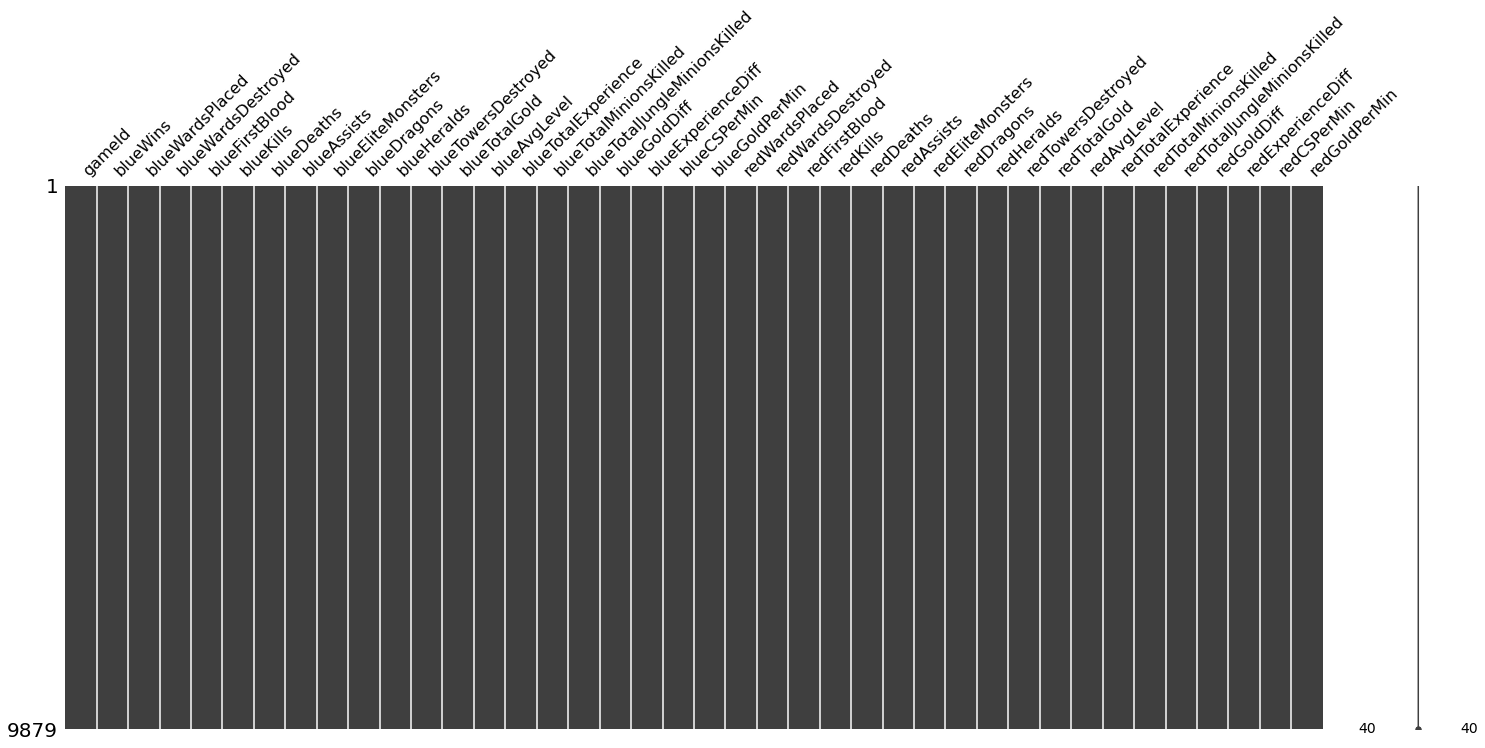

In [4]:
import missingno as mn

mn.matrix(df)

# Count unique values in column 'gameId' of the dataframe
print('Number of unique values in column "gameId" : ', df['gameId'].nunique())

dup_df = df.duplicated()
print('Duplicates : ', len(df[dup_df]))

### 2.3 Cleaning the Dataset

After confirming there are no duplicates in the data, the "gameId" column can be removed since it will have
no impact on the results.

We then print out a correlation table to see how each attribute correlates to one another. Additionally we create an array
containing correlation values greater than or equal to 0.1.

In [5]:
del df['gameId']

red_col = ['redFirstBlood','redKills','redAssists','redEliteMonsters','redDragons','redHeralds','redTowersDestroyed',
          'redTotalGold','redAvgLevel','redTotalExperience','blueTotalMinionsKilled','redTotalJungleMinionsKilled',
          'redGoldDiff','redExperienceDiff','redCSPerMin','redGoldPerMin','blueDeaths','blueWins']

blue_col = ['blueFirstBlood','blueKills','blueAssists','blueEliteMonsters','blueDragons','blueHeralds','blueTowersDestroyed',
          'blueTotalGold','blueAvgLevel','blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
          'blueGoldDiff','blueExperienceDiff','blueCSPerMin','blueGoldPerMin','redDeaths','blueWins',]

# View correlation between attributes
#df.corr()

----------------------

## 3. Data Visualization
// [2 points] Visualize basic feature distributions (> 5 plots, >= 1 categorical, >= 1 numeric)
- That is, plot the dynamic range & exploratory distribution plots (boxplots, histograms, kde) to better understand the data.
- Describe anything meaningful or potentially useful you discover from these visualizations.
- These may also help to understand what data is missing or needs imputation.
- Note: You can also use data from other sources to bolster visualizations.

// [2.5 points] (3.1 Data Exploration) (3.2 Data Relationship Exploration)
- Ask 3 interesting questions that are relevant to your dataset & explore visuals that help answer these questions.
- Use whichever visualization method is appropriate for your data.
- Important: Interpret the implications for each visualization.

## 4. Dimensionality Reduction
### Reference

#### 3.1.1 Win Rate by team color
Does being on a specific team have an impact on winning?

For context :
- Red team defends top right Nexus
- Blue team defends bottom left Nexus

Text(0, 0.5, 'Frequency')

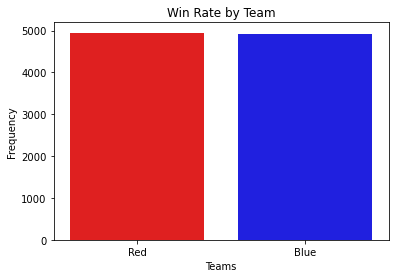

In [6]:
ax = sns.countplot(x="blueWins", data=df, palette=['red', 'blue'])
ax.set_title('Win Rate by Team')
ax.set_xlabel('Teams')
ax.set_xticks([0,1])
ax.set_xticklabels(['Red', 'Blue'])
ax.set_ylabel('Frequency')

Because each team puts you on a specific side of the map, some may think that having a specific perspective on the map
may make an impact on your chances of winning, but as shown above, the win rate for each team is relatively the same.


#### 3.1.2 Win Rate by

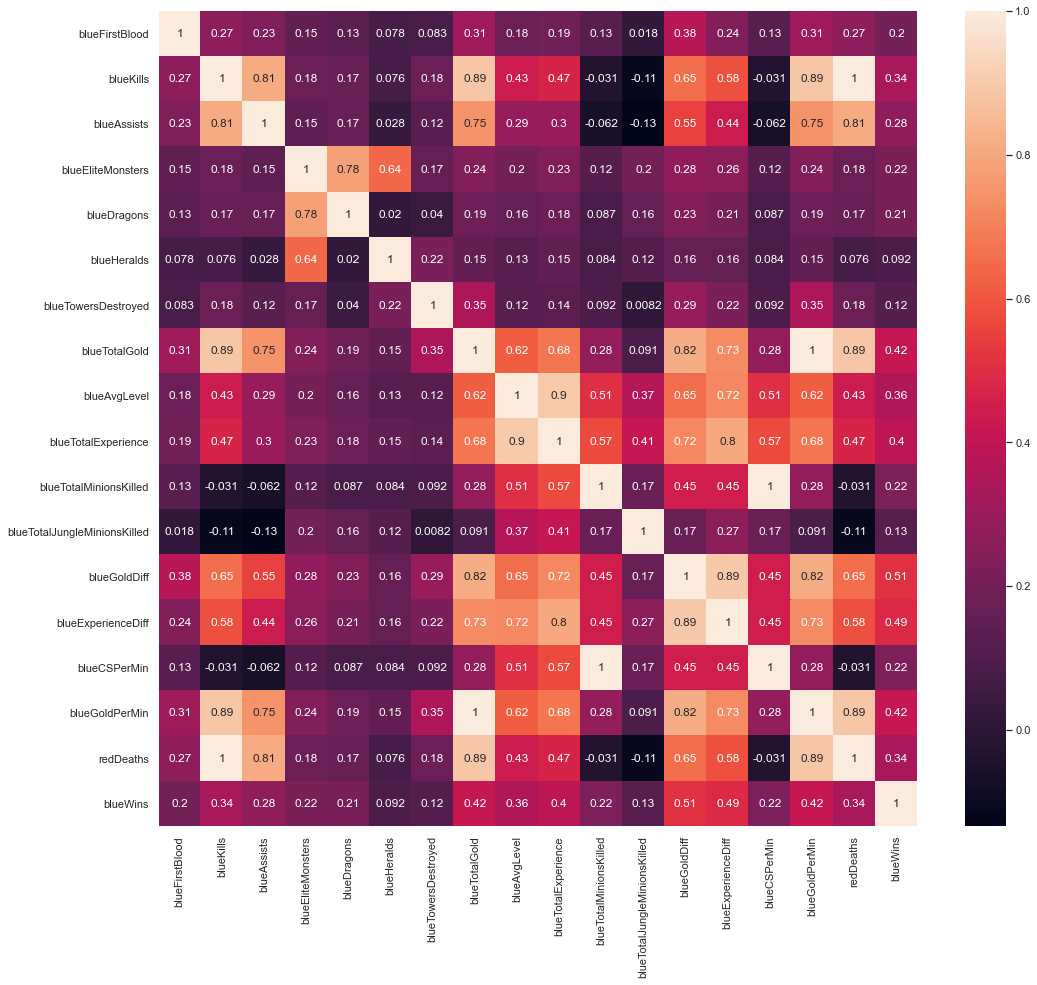

In [7]:
cmap = sns.set(style="darkgrid", palette="colorblind")

ax = plt.subplots(figsize=(17,15))
plt.pcolor(df[blue_col].corr())
plt.xticks(np.arange(0, len(blue_col), 1), blue_col)
plt.yticks(np.arange(0, len(blue_col), 1), blue_col)
plt.xticks(rotation=90)
sns.heatmap(df[blue_col].corr(),cmap=cmap,annot=True)
plt.show()

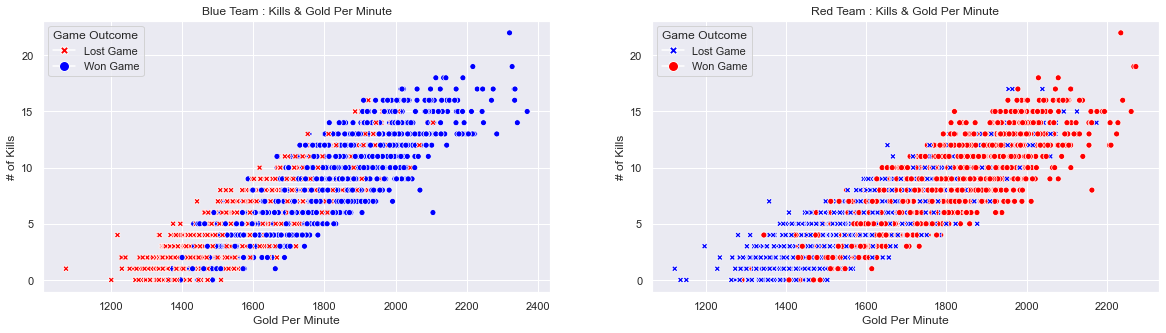

In [8]:
from matplotlib.lines import Line2D

df_win = df[df["blueWins"]==1]
df_lose = df[df["blueWins"]==0]

mark1 = {0:"X", 1:"o"}
legend_elements_1 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='red',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='blue',markersize=10)]

mark2 = {0:"o", 1:"X"}
legend_elements_2 = [Line2D([0],[0],marker='X',color='w',label='Lost Game',markerfacecolor='blue',markersize=8),
                     Line2D([0],[0],marker='o',color='w',label='Won Game',markerfacecolor='red',markersize=10)]

plt.subplots(figsize=(20,5))

plt.subplot(1,2,1)
ax = sns.scatterplot(data=df,x='blueGoldPerMin',y='blueKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark1)
ax.set_title('Blue Team : Kills & Gold Per Minute')
ax.set_xlabel('Gold Per Minute')
ax.set_ylabel('# of Kills')
ax.legend(title='Game Outcome',handles=legend_elements_1,loc='upper left')

plt.subplot(1,2,2)
ax = sns.scatterplot(data=df,x='redGoldPerMin',y='redKills',hue='blueWins',palette=['red','blue'],style='blueWins',markers=mark2)
ax.set_title('Red Team : Kills & Gold Per Minute')
ax.set_xlabel('Gold Per Minute')
ax.set_ylabel('# of Kills')
ax.legend(title='Game Outcome',handles=legend_elements_2,loc='upper left')

plt.show()

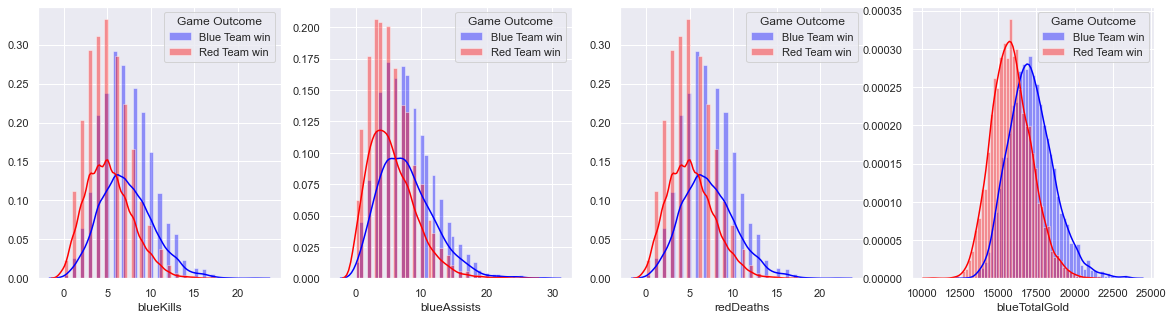

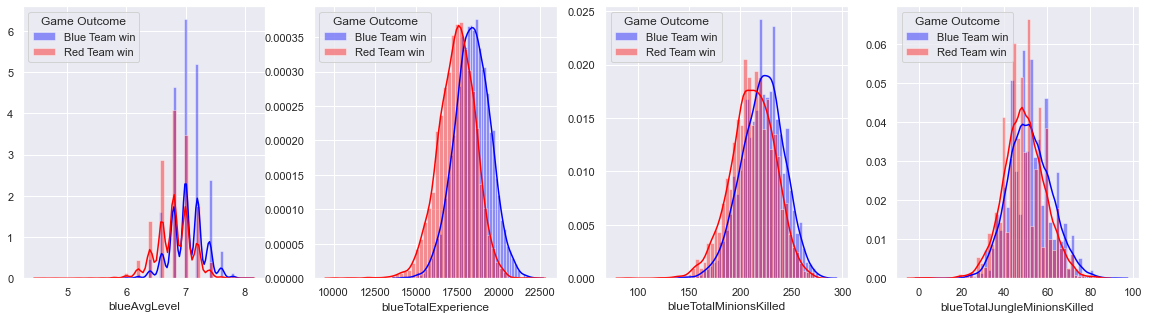

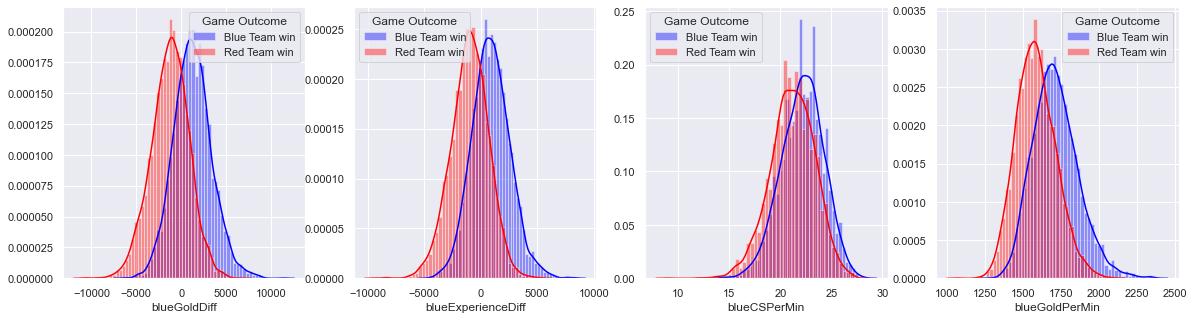

In [9]:
#blue_col.remove('redDeaths')
#blue_col.remove('blueWins')

new_blue = ['blueKills', 'blueAssists', 'redDeaths', 'blueTotalGold',
            'blueAvgLevel', 'blueTotalExperience','blueTotalMinionsKilled','blueTotalJungleMinionsKilled',
            'blueGoldDiff', 'blueExperienceDiff','blueCSPerMin', 'blueGoldPerMin']

c = 0
plt.subplots(figsize=(20,5))
for i in new_blue:
    plt.subplot(1,4,c+1)
    sns.distplot(df_win[i],label='Blue Team win',color='blue')
    sns.distplot(df_lose[i],label='Red Team win',color='red')
    plt.legend(title='Game Outcome')
    c=c+1

    if c == 4:
        plt.show()
        if i != new_blue[len(new_blue) - 1]:
            plt.subplots(figsize=(20,5))
        c=0

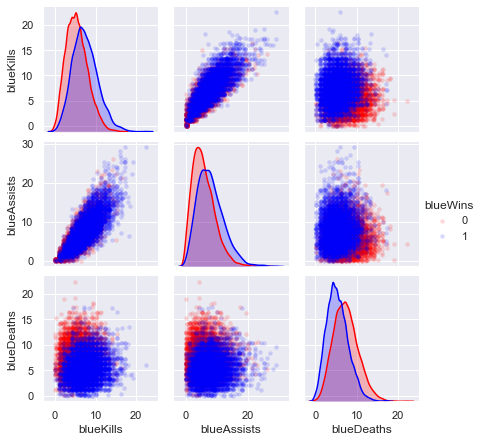

In [10]:
jitter_values = ['blueKills', 'blueAssists', 'blueDeaths', 'blueWins']

# lets make a pretty plot of the scatter matrix
df_jitter = df[jitter_values].copy()
df_jitter[['blueKills', 'blueAssists', 'blueDeaths']] += np.random.rand(len(df_jitter),3)/2
sns.pairplot(df_jitter, hue="blueWins", height=2,plot_kws=dict(s=20, alpha=0.15, linewidth=0), palette=['red', 'blue'])

plt.show()